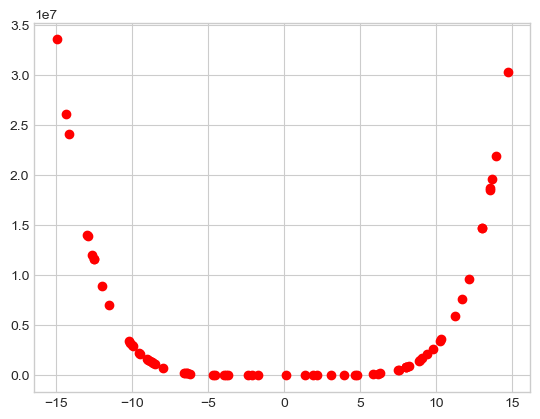

In [24]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-v0_8-whitegrid') 
import numpy as np 

noise_scale = 30    
number_of_samples = 70  
noise_scale += 20011191 % 70    
CWID = 20011191 % 4 + 3               

x = 30 * (np.random.rand(number_of_samples, 1) - 0.5) 
if CWID == 3:
    y = 6 * x + 7 * x**2 + 6 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 
elif CWID == 4:
    y = 6 * x + 7 * x**2 + 5 * x**4 + noise_scale*np.random.randn(number_of_samples, 1) 
elif CWID == 5:
    y = 6 * x + 8 * x**2 + 4 * x** 5 + noise_scale*np.random.randn(number_of_samples, 1) 
else:
    y = 6 * x + 7 * x**2 + 3 * x**6 + noise_scale*np.random.randn(number_of_samples, 1) 

plt.plot(x,y,'ro')

## Question 1 
Please plot the noisy data and the polynomial you found (in the same figure). You can use any value of m selected from 1, 2, 3, 4, 5, 6.

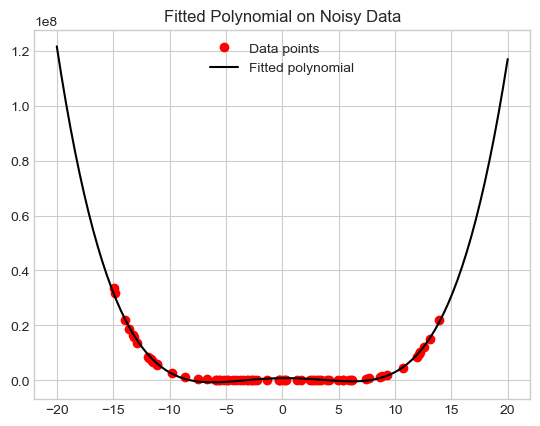

In [41]:
plt.plot(x, y, 'ro')

fitted = np.polyfit(x.flatten(), y.flatten(), 4)  # Fit a 4th-degree polynomial to the flattened x and y data
polynomial = np.poly1d(fitted)  # Create a polynomial function from the fitted coefficients
x_values = np.linspace(-20, 20, 100)  # Generate x values for plotting the fitted polynomial

plt.plot(x_values, polynomial(x_values), 'k')  # Plot the fitted polynomial curve
plt.title('Fitted Polynomial on Noisy Data')  # Set the title for the plot
plt.legend(['Data points', 'Fitted polynomial'])  # Add a legend to differentiate between data points and the fitted polynomial

## Question 2
Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8, 9 respectively. Identify the best choice of m. Discuss how m impacts the performance in terms model accuracy and overfitting.

### Explanation
The best choice for m is 6 as this is where MSE drops significantly and stabilizes. The lower values of m result in underfitting with high MSE, while increasing m further may lead to overfitting without meaningful improvement. Choosing m = 6 ensures a balance between capturing the data pattern and maintaining good generalization.

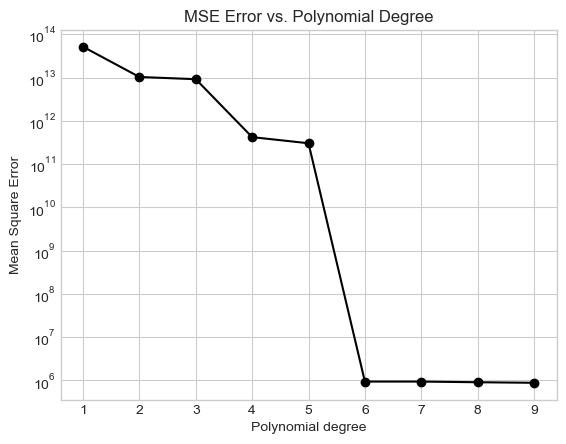

In [39]:
MSE = []  # Initialize an empty list to store the Mean Squared Errors (MSE)

for m in range(1, 10):  # Loop through polynomial degrees from 1 to 9
    fitted = np.polyfit(x.flatten(), y.flatten(), m)  # Fit a polynomial of degree 'm' to the data
    polynomial = np.poly1d(fitted)  # Create the polynomial function from the fitted coefficients
    predict = polynomial(x)  # Calculate the predicted values using the polynomial
    error = y - predict  # Calculate the error (difference between actual and predicted values)
    MSE.append(np.mean(error**2))  # Calculate and store the Mean Squared Error (MSE)

plt.figure()  # Create a new figure for plotting
plt.plot(range(1, 10), MSE, '-ko')  # Plot MSE values against polynomial degrees
plt.title('MSE Error vs. Polynomial Degree')  # Set the title for the plot
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.xlabel('Polynomial degree')  # Label the x-axis
plt.ylabel('Mean Square Error')  # Label the y-axis
plt.show()  # Display the plot

## Question 3
Initialize variable noise_scale to 150, 250, 350, 550, 750, and 950 respectively, re-run the algorithm,  and plot the polynomials with the best m found in (2). Discuss the impact of increasing noise on the accuracy and reliability of the polynomial parameters. How does the model's performance degrade with increasing noise? [You need to plot a figure like in (1) for EACH choice of noise scale.]

### Explanation
As noise levels rise, the model's accuracy and reliability tend to drop. However, when there are enough samples and the noise is evenly spread out, the performance can stay relatively steady, as one sample's noise might be balanced by another's. Still, with more noise, the model's performance will gradually weaken, though increasing the sample size and understanding the noise distribution can help reduce the impact.

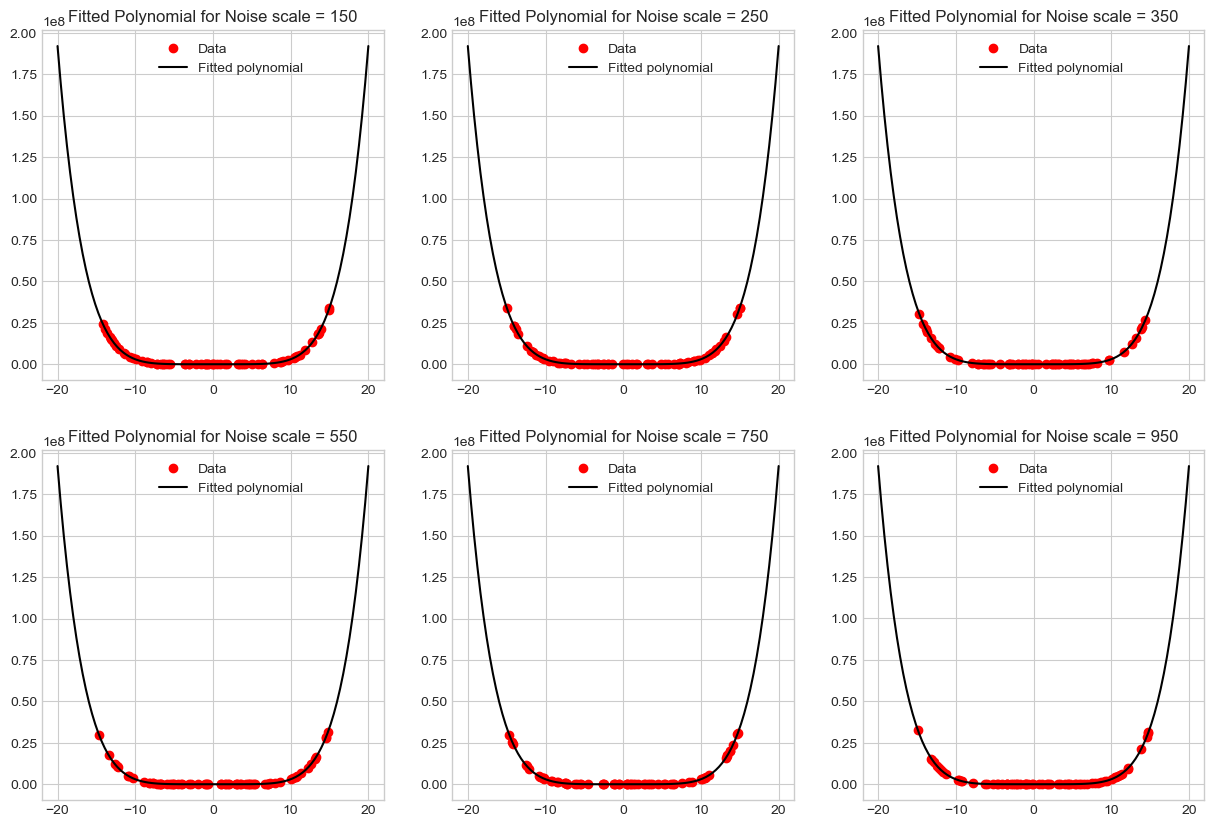

In [56]:
noise_scales = [150, 250, 350, 550, 750, 950]  # Define a list of noise scales to test
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Create a 2x3 grid of subplots with specified figure size
for i in range(len(noise_scales)):
    noise_scale = noise_scales[i]   
    number_of_samples = 70  
    noise_scale += 20011191 % 70  
    CWID = 20011191 % 4 + 3             

    x = 30 * (np.random.rand(number_of_samples, 1) - 0.5) 
    if CWID == 3:
        y = 6 * x + 7 * x**2 + 6 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 
    elif CWID == 4:
        y = 6 * x + 7 * x**2 + 5 * x**4 + noise_scale*np.random.randn(number_of_samples, 1) 
    elif CWID == 5:
        y = 6 * x + 8 * x**2 + 4 * x** 5 + noise_scale*np.random.randn(number_of_samples, 1) 
    else:
        y = 6 * x + 7 * x**2 + 3 * x**6 + noise_scale*np.random.randn(number_of_samples, 1) 

    axs[i//3, i%3].plot(x, y, 'ro')  # Plot the data points as red circles
    fitted = np.polyfit(x.flatten(), y.flatten(), 6)  # Fit a 6th-degree polynomial to the flattened x and y data
    polynomial = np.poly1d(fitted)  # Create the polynomial function from the fitted coefficients
    x_values = np.linspace(-20, 20, 100)  # Generate x values for plotting the fitted polynomial

    axs[i//3, i%3].plot(x_values, polynomial(x_values), 'k')  # Plot the fitted polynomial curve in blue
    axs[i//3, i%3].set_title('Fitted Polynomial for Noise scale = ' + str(noise_scales[i]))  # Set the title with the current noise scale
    axs[i//3, i%3].legend(['Data', 'Fitted polynomial'], loc='upper right', bbox_to_anchor=(0.80, 1))  # Add a legend for the data points and the fitted polynomial


## Question 4
Change variable number_of_samples to 100, 80, 40, 30, 20, and 10 respectively, re-run the algorithm, and plot the polynomials with the m found in (ii). Discuss the impact of the number of samples on the accuracy of the returned parameters. [You need to plot a figure like in (i) for EACH choice of number_of_samples.]

### Explanation
As the sample size decrease, the reliability of the models also decrease. With fewer samples, the regression model has less data to work with and the impacts of the noise present in individual samples is higher. This all contributes to a lower reliability and accuracy of the model. Because the correct order was identified in part 2, the models were able to keep the correct overall shape, even with a small number of samples.

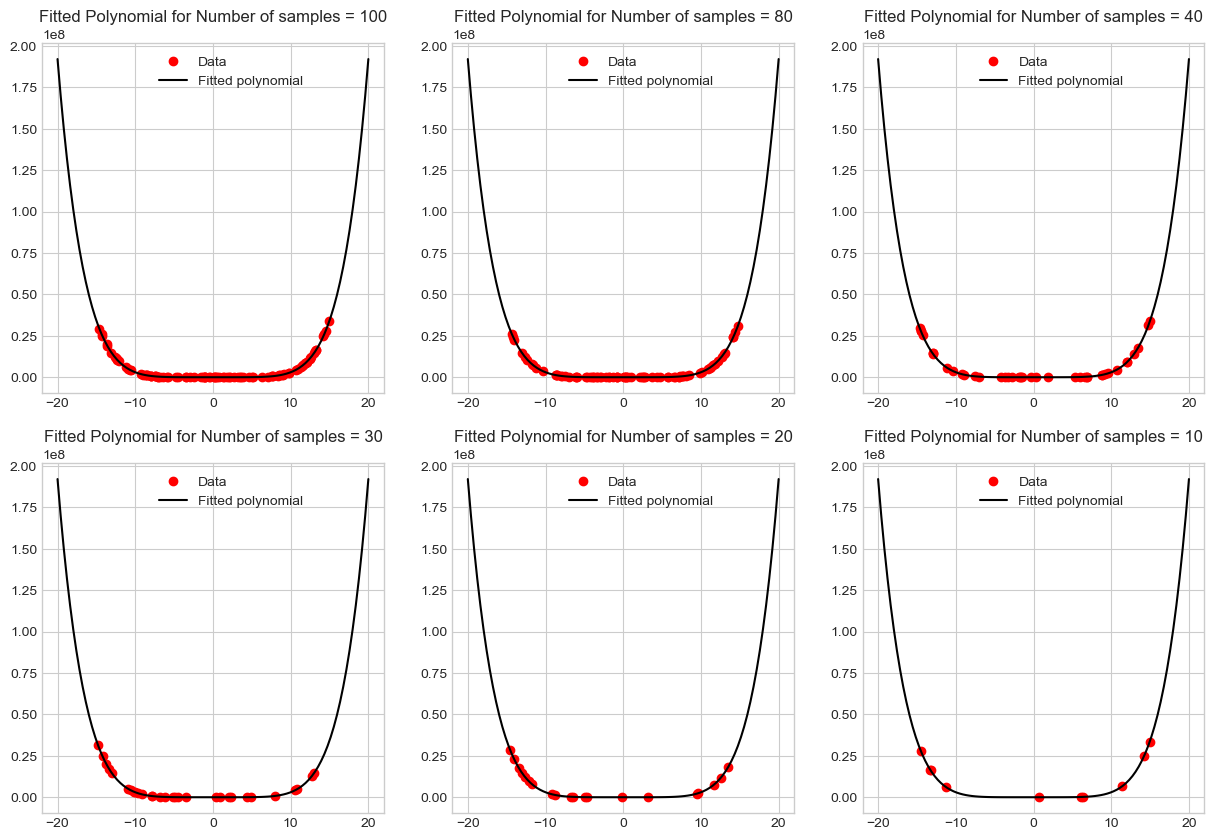

In [55]:
samples = [100, 80, 40, 30, 20, 10]  # Define a list of sample sizes to test
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Create a 2x3 grid of subplots with specified figure size

for i in range(len(samples)):
    noise_scale = 30    
    number_of_samples = samples[i]  
    noise_scale += 20011191 % 70    
    CWID = 20011191 % 4 + 3               

    x = 30 * (np.random.rand(number_of_samples, 1) - 0.5) 
    if CWID == 3:
        y = 6 * x + 7 * x**2 + 6 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 
    elif CWID == 4:
        y = 6 * x + 7 * x**2 + 5 * x**4 + noise_scale*np.random.randn(number_of_samples, 1) 
    elif CWID == 5:
        y = 6 * x + 8 * x**2 + 4 * x** 5 + noise_scale*np.random.randn(number_of_samples, 1) 
    else:
        y = 6 * x + 7 * x**2 + 3 * x**6 + noise_scale*np.random.randn(number_of_samples, 1) 

    axs[i//3, i%3].plot(x,y,'ro')  # Plot the data points as red circles
    fitted = np.polyfit(x.flatten(), y.flatten(), 6) # Fit a 6th-degree polynomial to the flattened x and y data
    polynomial = np.poly1d(fitted) # Create the polynomial function from the fitted coefficients
    x_values = np.linspace(-20,20,100) # Generate x values for plotting the fitted polynomial
    
    axs[i//3, i%3].plot(x_values, polynomial(x_values), 'k') # Plot the fitted polynomial curve in blue
    axs[i//3, i%3].set_title('Fitted Polynomial for Number of samples = ' + str(samples[i]))  # Set the title with the current noise scale
    axs[i//3, i%3].legend(['Data', 'Fitted polynomial'], loc='upper right', bbox_to_anchor=(0.80, 1))  # Add a legend for the data points and the fitted polynomial